In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [3]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector


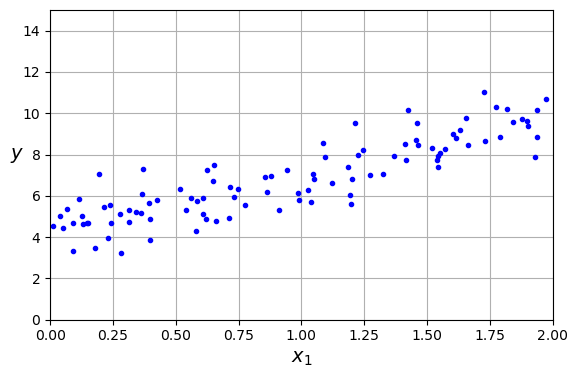

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()


In [5]:
from sklearn.preprocessing import add_dummy_feature

# Nous ajoutons la valeur biais = 1 à chaque instance
X_b = add_dummy_feature(X)
# Nous utilisons la fonction inv() pour inverser la matrice, et la fonction @ pour réaliser le produit matriciel
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y


In [6]:
theta_best


array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict


array([[4.21509616],
       [9.75532293]])

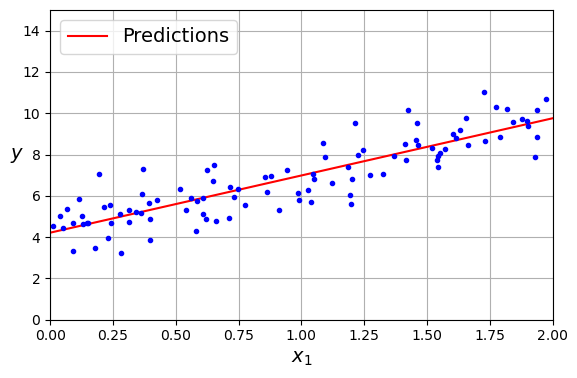

In [8]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()


In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [10]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)  # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [11]:
theta


array([[4.21509616],
       [2.77011339]])

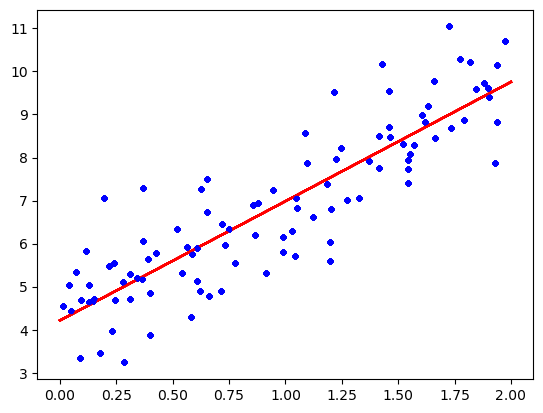

In [12]:
etas = [0.02, 0.1, 0.5]
n_iterations = 9
m = 100
theta = np.random.randn(2, 1)
for eta, i in zip(etas, range(1, 4)):
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        plt.plot(X_new, y_predict, "r-", label="Predictions")
        plt.plot(X, y, "b.")


In [13]:
theta_path_bgd = []


def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


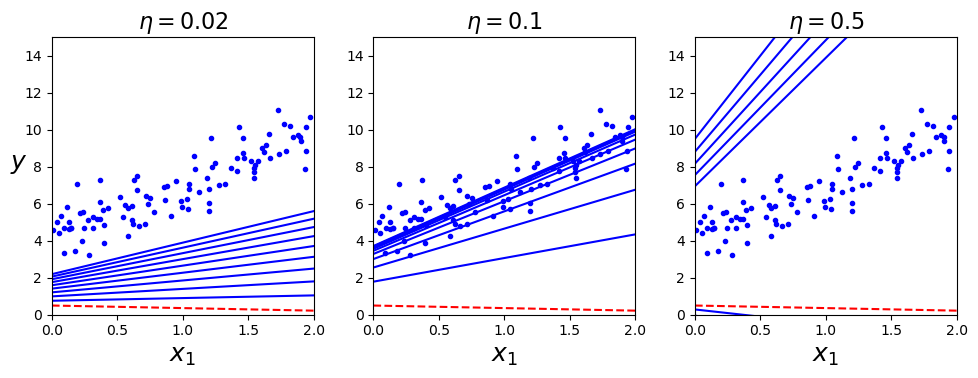

In [14]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()


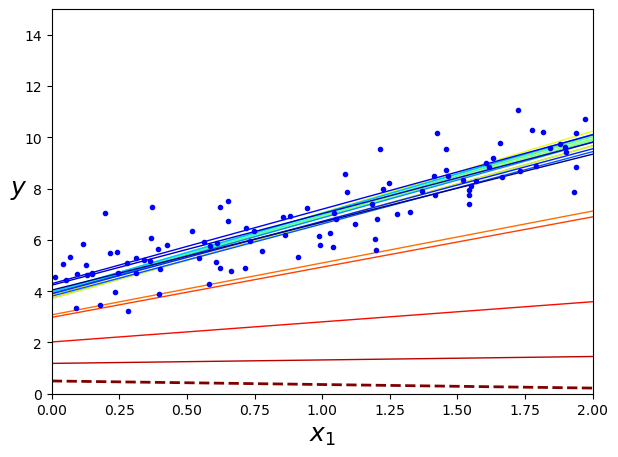

In [15]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50  # number of times the algorithm "sees" the whole dataset
t0, t1 = 5, 50  # learning schedule hyperparameters
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(1, 0, 20)]


def learning_schedule(t):
    return t0 / (t + t1)  # starting at 1/10 then decreasing towards 0


theta = np.random.randn(2, 1)  # random initialization

# loop over one epoch : epoch+=1 once the algorithm has gone through the whole dataset
for epoch in range(n_epochs):
    for i in range(m):  # looping over the dataset
        if epoch == 0 and i < 20:  # plotting the first 20 iterations in the first epoch
            y_predict = X_new_b.dot(theta)
            style = "-" if i > 0 else "--"
            width = 1 if i > 0 else 2
            plt.plot(X_new, y_predict, ls=style, lw=width, color=colors[i])
        random_index = np.random.randint(m)  # choosing a random index
        # selecting instance corresponding to random index
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # calculating gradient
        eta = learning_schedule(epoch * m + i)  # tweaking learning rate
        theta = theta - eta * gradients  # changing parameters
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()


In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

In [18]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [19]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

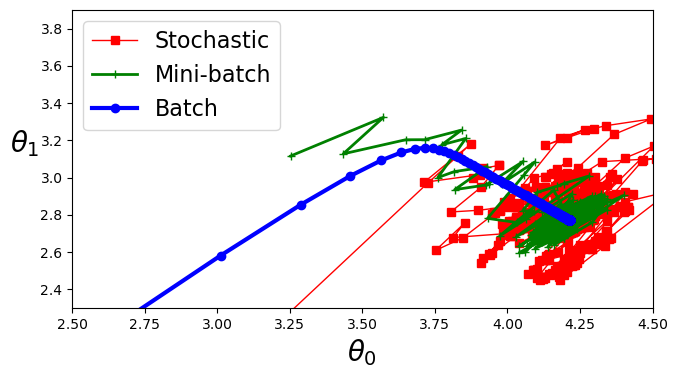

In [20]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

In [71]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

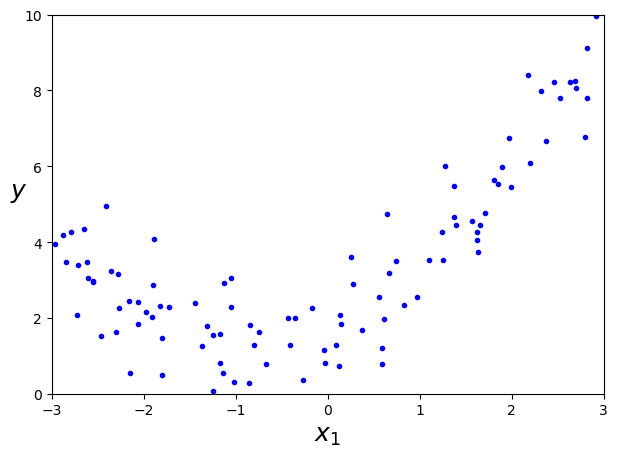

In [72]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [73]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [74]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

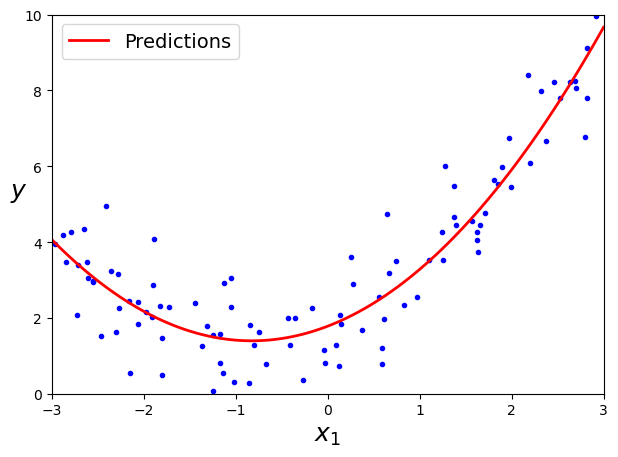

In [76]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

In [77]:
poly_features_300 = PolynomialFeatures(degree=300, include_bias=False)
X_poly_300 = poly_features_300.fit_transform(X)

In [78]:
lin_reg_300 = LinearRegression()
lin_reg_300.fit(X_poly_300, y)

LinearRegression()

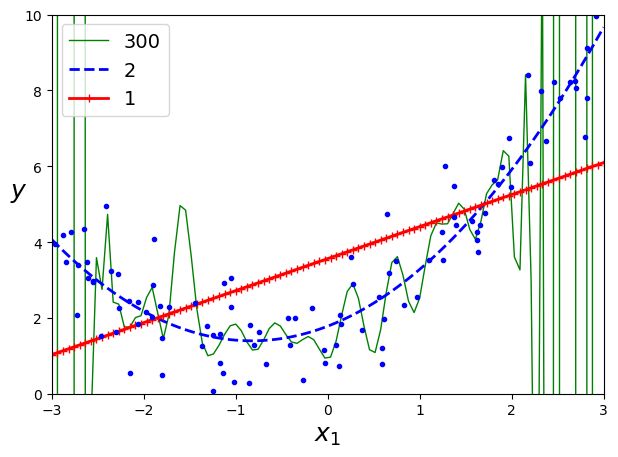

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import os

def plot_learning_curves(model, X, y, order):
	np.random.seed(42)
	if order == 1:
		out='linear_learning_curves'
	else:
		out=f'poly{order}_learning_curves'
	if not os.path.exists('images/'+out):
    # Crée le dossier si nécessaire
		os.makedirs('images/'+out)
	# Division du dataset
	X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
	train_errors, val_errors = [], []
	# A chaque iteration, le modèle est entraîné sur un dataset de plus en plus grand
	for m in range(1, len(X_train)):
		polybig_features = PolynomialFeatures(degree=order, include_bias=False)
		std_scaler = StandardScaler()
		lin_reg = LinearRegression()
		model = Pipeline([
				("poly_features", polybig_features),
				("std_scaler", std_scaler),
				("lin_reg", lin_reg),
        ])
		model.fit(X_train[:m], y_train[:m])
		y_train_predict = model.predict(X_train[:m])
		y_val_predict = model.predict(X_val)
		# Calcul de la fonction de coût
		train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
		val_errors.append(mean_squared_error(y_val, y_val_predict))
		plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
		plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
		plt.axis([0, len(X_train), 0, 4])
		plt.legend(loc='upper right')
		save_fig(f'{out}/{out}_{str(m)}')
		plt.close()
		plt.plot(X, y, 'b.')
		plt.plot(X_new, model.predict(X_new), 'r-', label=f'{out.split("_")[0]} prediction')
		plt.xlabel("$x_1$", fontsize=18)
		plt.ylabel("$y$", rotation=0, fontsize=18)
		plt.axis([-3, 3, 0, 10])
		plt.legend(loc='upper left')
		save_fig(f'{out}/{out.split("_")[0]}_predictions_{str(m)}')
		plt.close()

In [82]:
import imageio
import os

def gif(path, start, end='images'):
    file_names = os.listdir(path)
    image_files = [f for f in file_names if f.startswith(start+'_')]
    image_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))
    with imageio.get_writer(os.path.join(end, start+'.gif'), mode='I') as writer:
        for filename in image_files:
            image_path = os.path.join(path, filename)
            image = imageio.imread(image_path)
            writer.append_data(image)

In [83]:
lin_reg = LinearRegression()
out = 'linear_learning_curves'
#plot_learning_curves(lin_reg, X, y, 1)

In [33]:
path='images/linear_learning_curves'
start='linear_learning_curves'
#gif(path, start)
start='linear_predictions'
#gif(path, start)

In [34]:
out = 'poly2_learning_curves'
#plot_learning_curves(lin_reg, X, y, 2)

In [35]:
path='images/poly2_learning_curves'
start='poly2_learning_curves'
#gif(path, start)
start='poly2_predictions'
#gif(path, start)

In [84]:
out = 'poly10_learning_curves'
plot_learning_curves(lin_reg, X, y, 10)

In [85]:
path='images/poly10_learning_curves'
start='poly10_learning_curves'
gif(path, start)
start='poly10_predictions'
gif(path, start)

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [39]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [40]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

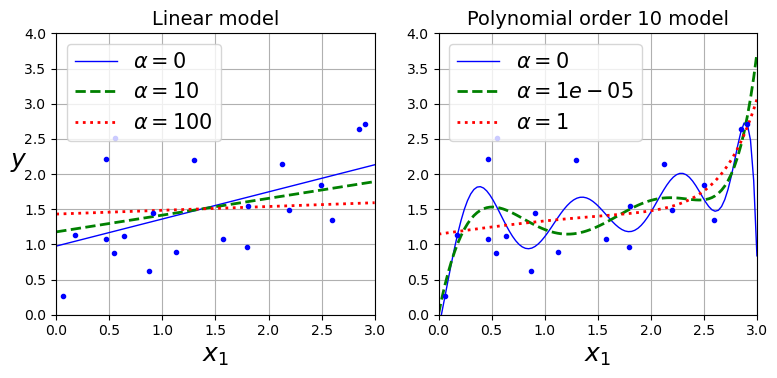

In [41]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
            title = 'Polynomial order 10 model'
        else:
            title = 'Linear model'
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
    plt.grid()
    plt.title(title)

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

c:\Users\ctesc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


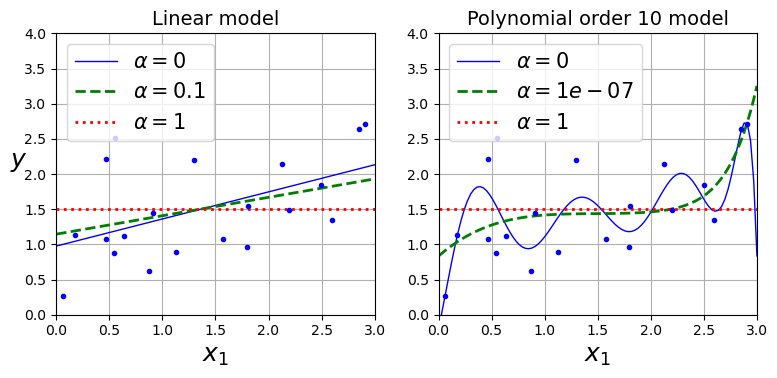

In [42]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

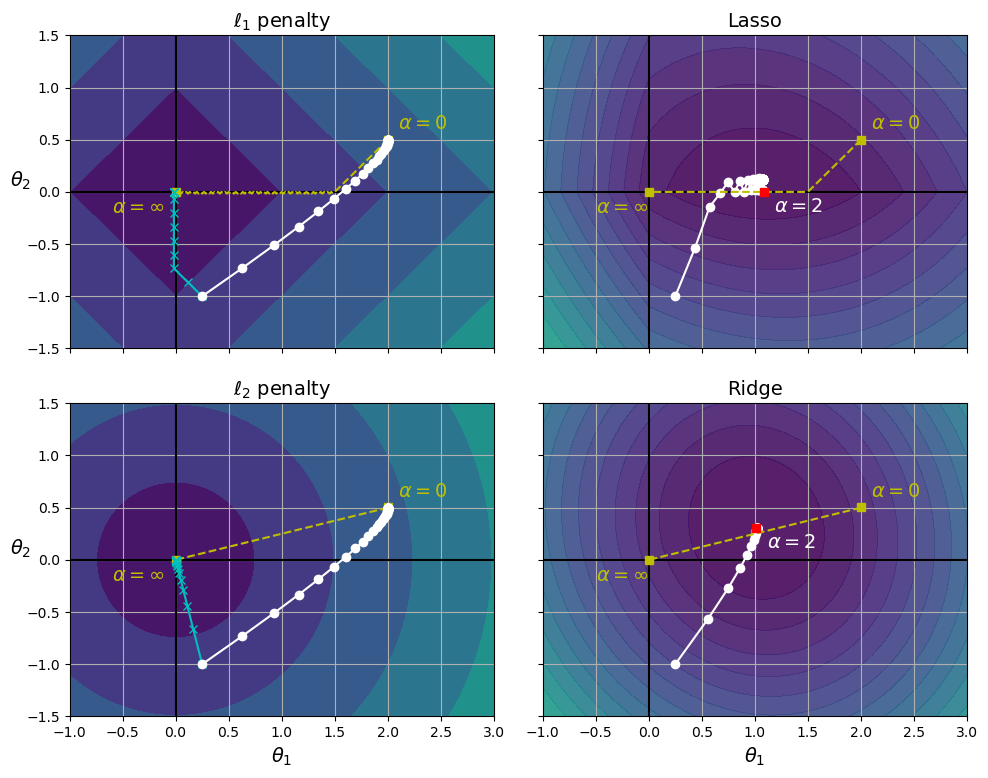

In [43]:
# extra code – this BIG cell generates and saves Figure 4–19

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    path_inf = bgd_path(t_init, Xr, yr, l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    path_0 = bgd_path(t_init, Xr, yr, l1=0, l2=0, core=1)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.text(-.6, -.2, r'$\alpha = \infty$', color='y')
    ax.plot(t1_min, t2_min, "ys")
    ax.text(t1_min+.1, t2_min+.1, r'$\alpha = 0$', color='y')
    ax.plot(path_inf[::8, 0], path_inf[::8, 1], 'c-x')
    ax.plot(path_0[::2, 0], path_0[::2, 1], 'w-o')
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[::2, 0], path_JR[::2, 1], "w-o")
    ax.plot(path_N[::2, 0], path_N[::2, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.text(-.5, -.2, r'$\alpha = \infty$', color='y')
    ax.plot(t1_min, t2_min, "ys")
    ax.text(t1_min+.1, t2_min+.1, r'$\alpha = 0$', color='y')
    ax.plot(t1r_min, t2r_min, "rs")
    ax.text(t1r_min+.1, t2r_min-.2, r'$\alpha = 2$', color='w')
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

save_fig("lasso_vs_ridge_plot")
plt.show()

In [44]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [45]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio est le ratio r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

Here we create $X$ a collection of random (uniform) numbers between -3 and 3, and from them we create $y$ a noisy order-2 polynomial function : $y = X^2+0.5X+2 + noise$. Then we split $X$ and $y$ into training and validation sets.

In [46]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [47]:
from copy import deepcopy

# Define a pipeline to transform the data in order 90 polynomial features and scale it
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

# Transform the data and scale it using the pipeline
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# Define a stochastic gradient descent regressor and set the hyperparameters
sgd_reg = SGDRegressor(
    max_iter=1,               # Maximum number of iterations for the optimization process
    # Tolerance for the minimum loss (set to -np.infty to disable)
    tol=-np.infty,
    # If True, continues training from where it left off in the previous iteration
    warm_start=True,
    # Type of regularization ('l1', 'l2', 'elasticnet', or None)
    penalty=None,
    # Mode for computing the learning rate ("constant", "optimal", "invscaling", or "adaptive")
    learning_rate="constant",
    eta0=0.0005,              # Initial learning rate
    random_state=42           # Seed used for initializing the random weights
)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
# Train the model for a maximum of 1000 epochs
for epoch in range(1000):
    # Fit the regressor on the training data
    sgd_reg.fit(X_train_poly_scaled, y_train)
    # Predict the target values for the validation data
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    # Compute the mean squared error for the predicted target values
    val_error = mean_squared_error(y_val, y_val_predict)
    # Check if the validation error is lower than the current minimum validation error
    if val_error < minimum_val_error:
        # Update the minimum validation error and best epoch
        minimum_val_error = val_error
        best_epoch = epoch
        # Deep copy the current regressor to save the best model
        best_model = deepcopy(sgd_reg)


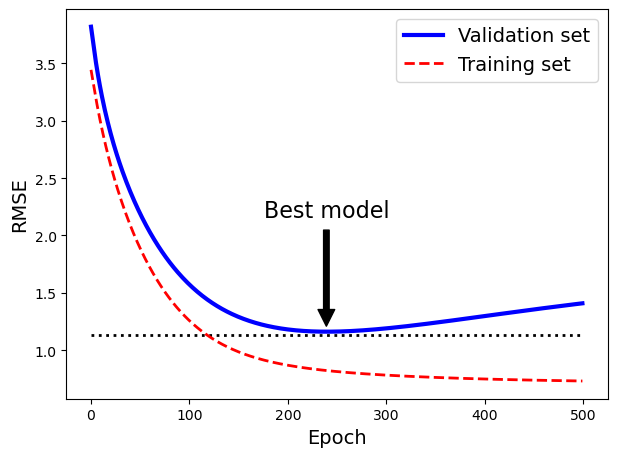

In [48]:
# Create an instance of the SGDRegressor class with the specified hyperparameters
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

# Set the number of epochs to 500
n_epochs = 500

# Initialize empty lists to store the training and validation errors for each epoch
train_errors, val_errors = [], []

# Loop through each epoch
for epoch in range(n_epochs):
    # Fit the model to the training data
    sgd_reg.fit(X_train_poly_scaled, y_train)

    # Use the trained model to make predictions on the training and validation data
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)

    # Compute the mean squared error for both the training and validation predictions
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

# Find the epoch with the lowest validation error
best_epoch = np.argmin(val_errors)

# Compute the best validation RMSE
best_val_rmse = np.sqrt(val_errors[best_epoch])

# Annotate the plot with the best model's epoch and RMSE
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

# Adjust the best_val_rmse to make the plot look better
best_val_rmse -= 0.03

# Plot the validation and training RMSE as a function of epoch
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

# Save the figure and display it
save_fig("early_stopping_plot")
plt.show()


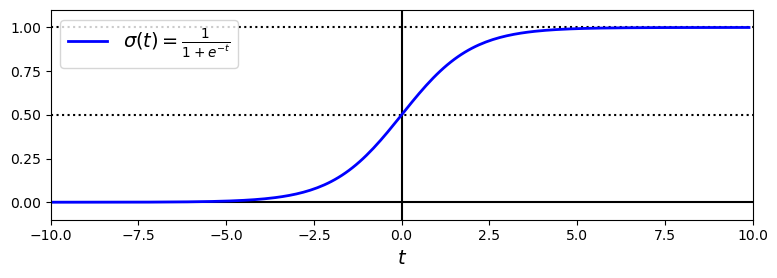

In [49]:
X = np.arange(-10, 10, .1)
y = 1/(1 + np.exp(-X))
plt.figure(figsize=(8, 3))
plt.axis([-10, 10, -0.1, 1.1])
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00])
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-.1, 1.1], "k-")
plt.plot(X, y, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.legend()
plt.xlabel(r'$t$')
save_fig("logistic_function_plot")
plt.show()

In [50]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [51]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

c:\Users\ctesc\anaconda3\lib\site-packages\matplotlib\patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


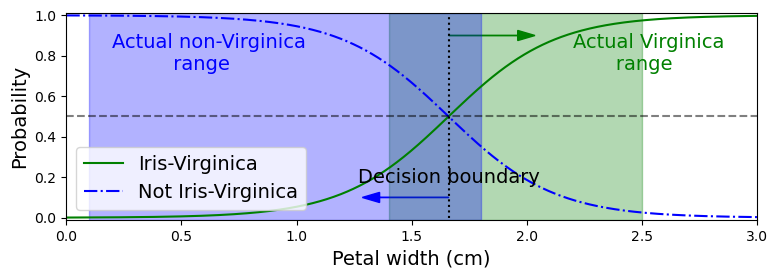

In [53]:
from matplotlib import patches
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
half_index = np.argmin(y_proba[:,0]>=.5)
X_half = X_new[half_index]
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b-.", label="Not Iris-Virginica")
plt.legend(loc=('lower left'))
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.axis([0, 3, -0.01, 1.01])
plt.plot([X_half, X_half], [0, 1], "k:")
plt.plot([0, 3], [0.5, 0.5], 'k--', alpha=.5)
plt.text(x=X_half, y=0.2, s='Decision boundary', ha='center', va='center')
plt.arrow(x=X_half, y=0.1, dx=-0.3, dy=0, color='blue', head_width=0.05)
plt.arrow(x=X_half, y=0.9, dx=0.3, dy=0, color='green', head_width=0.05)
rect = patches.Rectangle((1.4, -0.01), width=1.1, height=1.02, color='green', alpha=0.3)
plt.gca().add_patch(rect)
plt.text(x=2.2, y=0.73, s='Actual Virginica\n       range', color='g')
rect = patches.Rectangle((0.1, -0.01), width=1.7, height=1.02, color='blue', alpha=0.3)
plt.gca().add_patch(rect)
plt.text(x=0.2, y=0.73, s='Actual non-Virginica\n          range', color='b')
save_fig('logistic_regression_prediction')
plt.show()

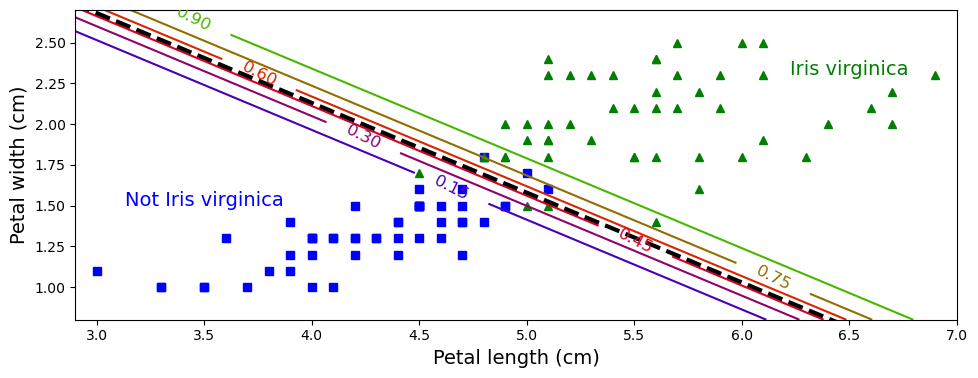

In [54]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length (cm)", fontsize=14)
plt.ylabel("Petal width (cm)", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

In [55]:
X = iris['data'][:, (2, 3)] #  petal length and width
y = iris['target']          #  iris species

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

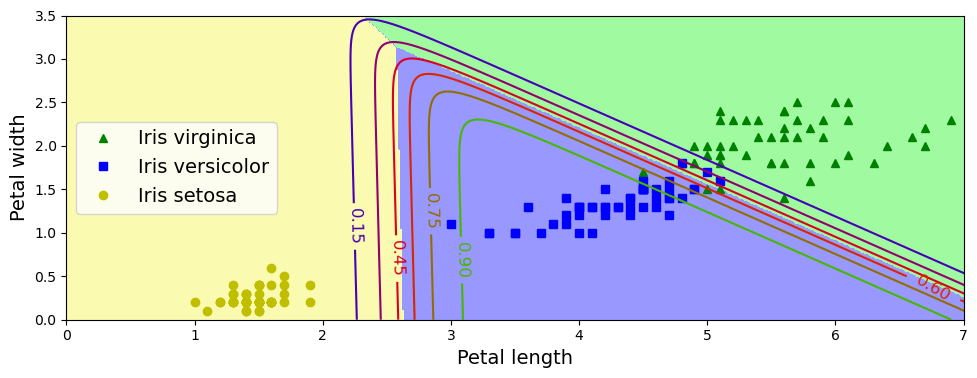

In [56]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

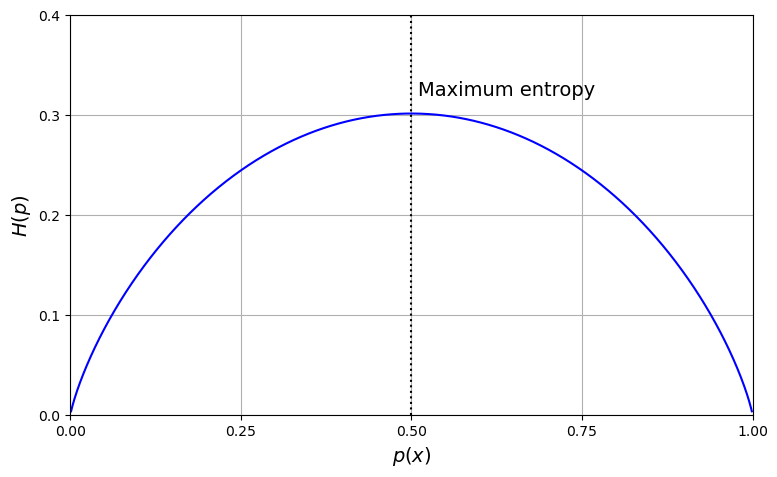

In [57]:
proba = np.linspace(0.001, 0.999, 999)
entropy = -(proba*np.log(proba)+(1-proba)*np.log(1-proba))/np.log(10)
plt.figure(figsize=(8, 5))
plt.plot(proba, entropy, 'b-')
plt.grid()
plt.axis([0, 1, 0, 0.4])
plt.xlabel(r'$p(x)$')
plt.ylabel(r'$H(p)$')
plt.plot([0.5, 0.5], [0, 0.4], 'k:')
plt.xticks([0, 0.25, 0.5, 0.75, 1])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4])
plt.text(x=0.51, y=0.32, s='Maximum entropy')
save_fig('binary_event_entropy')
plt.show()

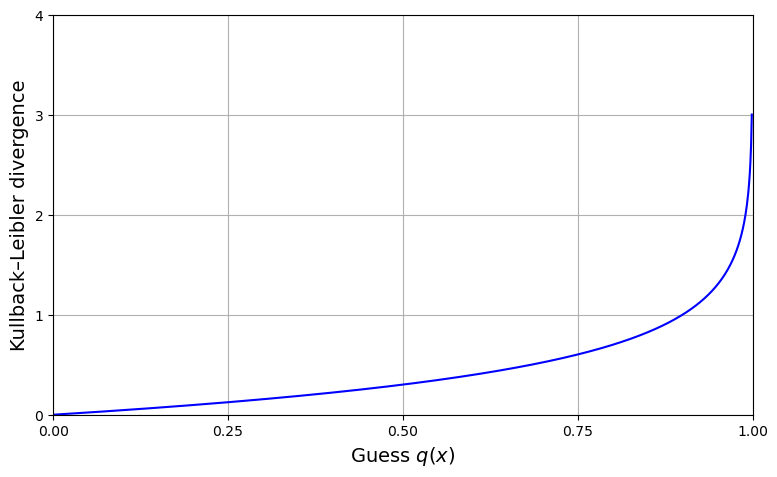

In [58]:
real_proba = 0
guess = np.linspace(0.001, 0.999, 999)
if real_proba in [0,1] :
    entropy = 0
else:
    entropy = -(real_proba*np.log(real_proba)+(1-real_proba)*np.log(1-real_proba))/np.log(10)
cross_e = -(real_proba*np.log(guess)+(1-real_proba)*np.log(1-guess))/np.log(10)
dkl = cross_e-entropy
plt.figure(figsize=(8, 5))
plt.plot(guess, dkl, 'b-')
plt.grid()
plt.axis([0, 1, 0, 4])
plt.xlabel(r'Guess $q(x)$')
plt.ylabel('Kullback–Leibler divergence')
#plt.plot([0.5, 0.5], [0, 4], 'k:')
plt.xticks([0, 0.25, 0.5, 0.75, 1])
plt.yticks([0, 1, 2, 3, 4])
save_fig('binary_event_cross_entropy')
plt.show()

In [17]:
X = iris['data'][:, 2:]
y = iris['target']

In [20]:
X_bias = np.c_[np.ones([len(X), 1]), X]
np.random.seed(2042)

In [21]:
test_ratio = 0.2
val_ratio = 0.2
total_size = len(X_bias)

test_size = int(test_ratio * total_size)
val_size = int(val_ratio * total_size)
train_size = total_size - test_size - val_size

In [22]:
rnd_indices = np.random.permutation(total_size)

X_train = X_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_val = X_bias[rnd_indices[train_size:-test_size]]
y_val = y[rnd_indices[train_size:-test_size]]
X_test = X_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [23]:
def one_hot(y):
    n_classes = np.max(y)+1
    m = len(y)
    y_onehot = np.zeros((m, n_classes))
    y_onehot[np.arange(0, m, 1), y] = 1
    return y_onehot

In [24]:
y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)
y_val_oh = one_hot(y_val)

In [25]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps/exp_sums

In [26]:
def loss_function(y_oh, y_proba):
    epsilon = 1e-7 # value to prevent error due to log(zero)
    return -np.mean(np.sum(y_oh * np.log10(y_proba + epsilon), axis=1))

In [27]:
def apply_gradients(theta, eta, X, y_oh, y_proba):
    error = y_proba-y_oh
    grad = 1/y_proba.shape[0] * X.T.dot(error)
    return theta - eta * grad

In [28]:
def val_score(X_val, y_val, theta):
    logits = X_val.dot(theta)
    y_proba_val = softmax(logits)
    y_predict=np.argmax(y_proba_val, axis=1)
    accuracy_score = np.mean(y_predict==y_val)
    return accuracy_score

In [29]:
n_inputs = X_train.shape[1]
n_outputs = y_train_oh.shape[1]
theta = np.random.randn(n_inputs, n_outputs)
n_instances = X_train.shape[0]
n_iterations = 5000
eta = 0.01

In [30]:
for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    loss = loss_function(y_train_oh, y_proba)
    acc_val = val_score(X_val, y_val, theta)
    if iteration % 500 == 0:
        print(iteration, 'Loss = ', loss, 'Accuracy score = ', acc_val)
    theta = apply_gradients(theta, eta, X_train, y_train_oh, y_proba)

0 Loss =  2.365257131405726 Accuracy score =  0.3
500 Loss =  0.36263861287089655 Accuracy score =  0.6333333333333333
1000 Loss =  0.29874255106237624 Accuracy score =  0.6666666666666666
1500 Loss =  0.2611143082610437 Accuracy score =  0.7666666666666667
2000 Loss =  0.23645149438982982 Accuracy score =  0.8
2500 Loss =  0.21882058546987018 Accuracy score =  0.9
3000 Loss =  0.2053878046280081 Accuracy score =  0.9
3500 Loss =  0.1946692190674826 Accuracy score =  0.9
4000 Loss =  0.18581945600825867 Accuracy score =  0.9
4500 Loss =  0.17832162448249342 Accuracy score =  0.9666666666666667
